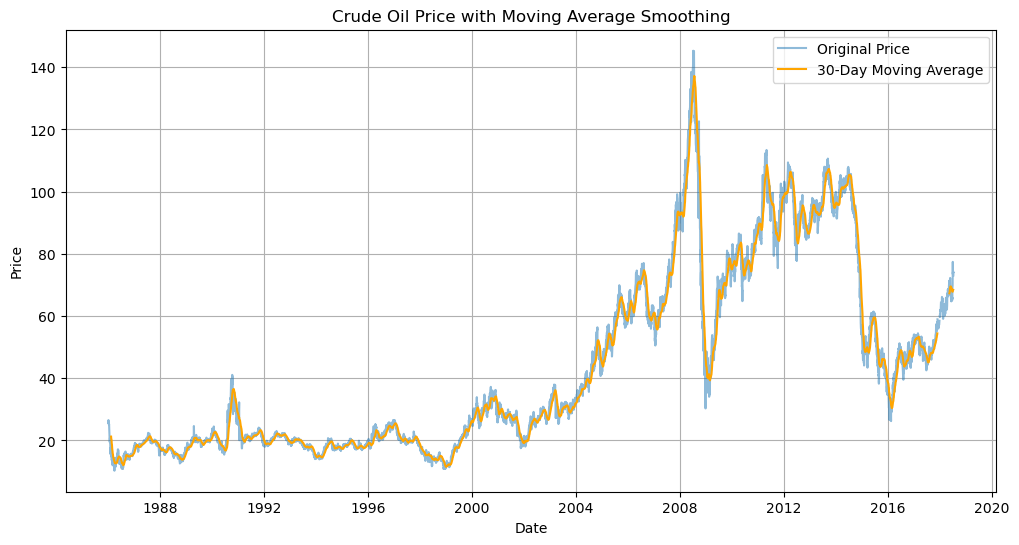

C:\Users\heman\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\heman\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\heman\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


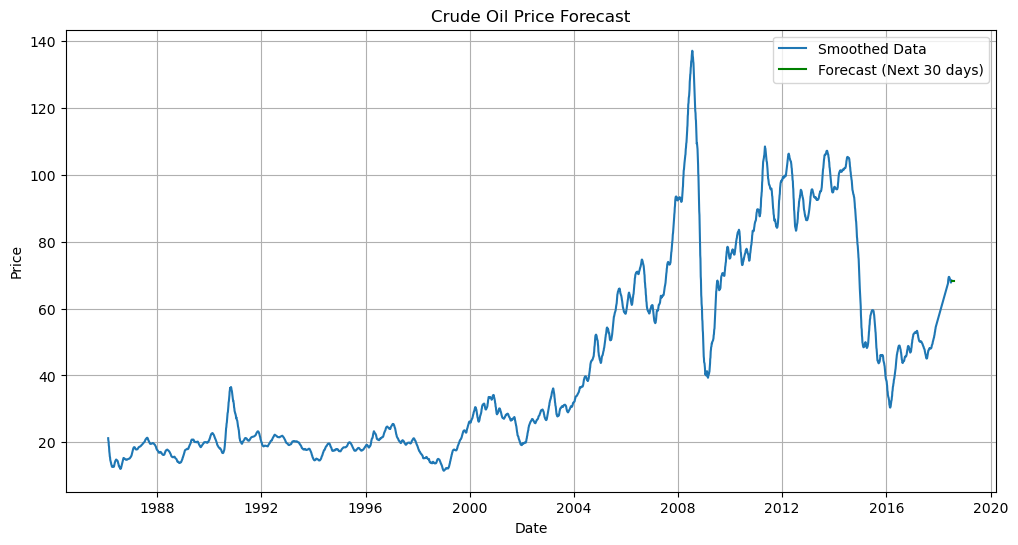

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Step 1: Load the dataset
file_path = r"C:\Users\heman\OneDrive\Desktop\abdul\TSA\EX 5\Crude Oil Prices Daily.xlsx"
df = pd.read_excel(file_path)

# Step 2: Preprocess the data
df.columns = ['Date', 'Price']  # Rename columns if necessary
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

# Step 3: Apply Moving Average Smoothing
window_size = 30
df['SMA_30'] = df['Price'].rolling(window=window_size).mean()

# Plot the original vs smoothed
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Original Price', alpha=0.5)
plt.plot(df['SMA_30'], label='30-Day Moving Average', color='orange')
plt.title('Crude Oil Price with Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Drop NaN values for modeling
df_clean = df.dropna()

# Step 5: Simple Forecasting using Exponential Smoothing (one-step ahead)
model = SimpleExpSmoothing(df_clean['SMA_30'])
model_fit = model.fit(smoothing_level=0.2, optimized=False)
forecast = model_fit.forecast(steps=30)  # Forecast next 30 days

# Step 6: Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df_clean.index, df_clean['SMA_30'], label='Smoothed Data')
plt.plot(pd.date_range(df_clean.index[-1], periods=30, freq='D'),
         forecast, label='Forecast (Next 30 days)', color='green')
plt.title('Crude Oil Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
